**Imports**

In [23]:
import xml.etree.ElementTree as et 
import pandas as pd 
import glob
from datetime import datetime
import re
import string
import spacy
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from textwrap import wrap

**Column Definitions**

In [4]:
df_cols = ['id','title', 'date', 'text','depressive']

**Positive Chunks to Dataframe**

In [5]:
t_id = ""
rows = []
directories = glob.glob("C:/Users/USER/Thesis/data/data/clef-erisk/positive_examples_anonymous_chunks/chunk[0-9]*")
for directory in directories:
    filenames = glob.glob(directory+"/train_subject[0-9]*_[0-9]*.xml")
    for filename in filenames:
        with open(filename, 'r', encoding="utf-8") as content:

            tree = et.parse(content)
            root = tree.getroot()
            for node in root:
                t_title = ""
                t_date = ""
                t_text = ""
                if node.tag == "ID":
                    t_id = node.text
                else:
                    if node.tag == "WRITING":
                        for val in node:
                            if val.tag == "TITLE":
                                if len(val.text) == 3 and val.text [1] == " ":
                                    t_title = None
                                else:
                                    t_title = val.text
                            elif val.tag == "DATE":
                                if len(val.text) == 3 and val.text [1] == " ":
                                    t_date = None
                                else:
                                    t_date = datetime.strptime(val.text, ' %Y-%m-%d %H:%M:%S ')
                            elif val.tag == "TEXT":
                                if len(val.text) == 3 and val.text [1] == " ":
                                    t_text = None
                                else:
                                    t_text = val.text
                    rows.append({'id':t_id, 'title':t_title, 'date':t_date, 'text':t_text, 'depressive':True})
positive_dataframe = pd.DataFrame(rows, columns = df_cols)
display(positive_dataframe)

,id,title,date,text,depressive
0,train_subject1095,None,2014-04-30 10:52:35,The last line is pretty much the same as the ...,True
1,train_subject1095,None,2014-04-30 10:25:52,On the flipside generic canned ravioli is jus...,True
2,train_subject1095,None,2014-04-30 10:23:26,At least make it illegal to perform on infant...,True
3,train_subject1095,None,2014-04-30 10:20:06,I feel like I am the only who has never seen ...,True
4,train_subject1095,None,2014-04-30 10:16:36,If anything it was an act of God for his chut...,True
...,...,...,...,...,...
30846,train_subject9951,None,2015-05-28 17:35:17,I watched a documentary on that and there was...,True
30847,train_subject9951,None,2015-05-27 22:14:51,Lucky you! Going to Hamburg would be my dream...,True
30848,train_subject9951,None,2015-05-27 21:06:11,Hannover! I took a [picture](https://40.media...,True
30849,train_subject9951,None,2015-05-27 20:51:25,Hey I live in Germany and I saw two horses ca...,True


**Negative Chunks to Dataframe**

In [6]:
t_id = ""
rows = []
directories = glob.glob("C:/Users/USER/Thesis/data/data/clef-erisk/negative_examples_anonymous_chunks/chunk[0-9]*")
for directory in directories:
    filenames = glob.glob(directory+"/train_subject[0-9]*_[0-9]*.xml")
    for filename in filenames:
        with open(filename, 'r', encoding="utf-8") as content:

            tree = et.parse(content)
            root = tree.getroot()
            for node in root:
                t_title = ""
                t_date = ""
                t_text = ""
                if node.tag == "ID":
                    t_id = node.text
                else:
                    if node.tag == "WRITING":
                        for val in node:
                            if val.tag == "TITLE":
                                if len(val.text) == 3 and val.text [1] == " ":
                                    t_title = None
                                else:
                                    t_title = val.text
                            elif val.tag == "DATE":
                                if len(val.text) == 3 and val.text [1] == " ":
                                    t_date = None
                                else:
                                    t_date = datetime.strptime(val.text, ' %Y-%m-%d %H:%M:%S ')
                            elif val.tag == "TEXT":
                                if len(val.text) == 3 and val.text [1] == " ":
                                    t_text = None
                                else:
                                    t_text = val.text
                    rows.append({'id':t_id, 'title':t_title, 'date':t_date, 'text':t_text, 'depressive':False})
negative_dataframe = pd.DataFrame(rows, columns = df_cols)
display(negative_dataframe)

,id,title,date,text,depressive
0,train_subject1015,Kripparrian on the deadliest cards of GvG so ...,2014-11-20 12:01:21,,False
1,train_subject1015,Bladestorm: Nightmare - sequel to 2007 game w...,2014-11-20 10:23:52,,False
2,train_subject1015,Plane that carries planes costs $250 million,2014-11-19 18:06:22,,False
3,train_subject1015,What assumption did you harbour for far too l...,2014-11-19 17:00:56,And what caused your head to asplode as a res...,False
4,train_subject1015,HTC One M8 Play Edition Android 5.0 update dr...,2014-11-19 13:43:39,,False
...,...,...,...,...,...
264167,train_subject9974,None,2015-04-02 16:52:44,"Yeah, I have known too many privates end up w...",False
264168,train_subject9974,None,2015-04-02 16:14:56,I am a soldier. I am regularly away from home...,False
264169,train_subject9974,ELI5:the button,2015-04-02 04:15:51,Please explain the button at /r/thebutton,False
264170,train_subject9974,None,2015-04-02 02:33:16,Stars and Stripes is reporting the same thing...,False


**Dataframes Concatenation**

In [7]:
frames = [positive_dataframe,negative_dataframe]
corpus = pd.concat(frames,ignore_index=True)
display(corpus)

,id,title,date,text,depressive
0,train_subject1095,None,2014-04-30 10:52:35,The last line is pretty much the same as the ...,True
1,train_subject1095,None,2014-04-30 10:25:52,On the flipside generic canned ravioli is jus...,True
2,train_subject1095,None,2014-04-30 10:23:26,At least make it illegal to perform on infant...,True
3,train_subject1095,None,2014-04-30 10:20:06,I feel like I am the only who has never seen ...,True
4,train_subject1095,None,2014-04-30 10:16:36,If anything it was an act of God for his chut...,True
...,...,...,...,...,...
295018,train_subject9974,None,2015-04-02 16:52:44,"Yeah, I have known too many privates end up w...",False
295019,train_subject9974,None,2015-04-02 16:14:56,I am a soldier. I am regularly away from home...,False
295020,train_subject9974,ELI5:the button,2015-04-02 04:15:51,Please explain the button at /r/thebutton,False
295021,train_subject9974,None,2015-04-02 02:33:16,Stars and Stripes is reporting the same thing...,False


**Null Checking**

In [8]:
corpus.isnull().sum()

id                 0
title         198720
date               0
text               2
depressive         0
dtype: int64

**Null Removing**

In [9]:
corpus.dropna(subset = ['text'], inplace=True)
corpus.isnull().sum()

id                 0
title         198718
date               0
text               0
depressive         0
dtype: int64

**Contraction Removing**

In [10]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text
corpus['text']=corpus['text'].apply(lambda x:expand_contractions(x))

**Contraction Removing**/2

contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)


corpus['text']=corpus['text'].apply(lambda x:expand_contractions(x))

**Lowercasing, Digit, Punctuation and White Space Removing**

In [11]:
corpus['text']=corpus['text'].apply(lambda x: x.lower())
corpus['text']=corpus['text'].apply(lambda x: re.sub('\w*\d\w*','', x))
corpus['text']=corpus['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
corpus['text']=corpus['text'].apply(lambda x: re.sub(' +',' ',x))

**Lemmatizing and Stop Word Removal in a new DataFrame**

In [12]:
corpus_copy = corpus.copy()

In [13]:
nlp = spacy.load('en_core_web_lg',disable=['parser', 'ner'])

**Document Term Matrix Generation**

In [14]:
corpus_copy['lemmatized']=corpus_copy['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [18]:
corpus_grouped = corpus_copy[['depressive','lemmatized']].groupby(by='depressive').agg(lambda x:' '.join(x))

In [19]:
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(corpus_grouped['lemmatized'])
corpus_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
corpus_dtm.index=corpus_grouped.index

In [24]:
corpus_dtm=corpus_dtm.transpose()

**Word Cloud Generation**

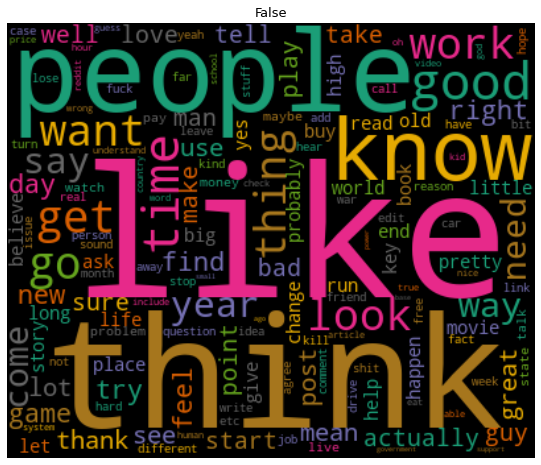

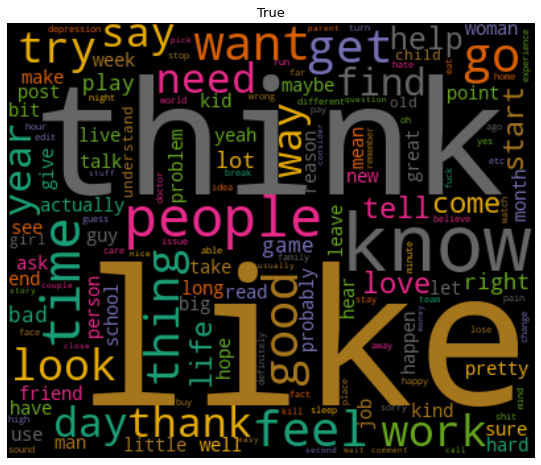

In [25]:
def generate_wordcloud(data,title):
    wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(title,fontsize=13)
    plt.show()



for index,depressive in enumerate(corpus_dtm.columns):
    generate_wordcloud(corpus_dtm[depressive].sort_values(ascending=False),depressive)

**General Statistics:Submission and Subject Count**

In [27]:
corpus_copy.groupby("depressive").agg(number_of_subjects = ("id", "nunique"),submissions = ("depressive", "count"),)

,number_of_subjects,submissions
depressive,,
False,403,264170
True,83,30851


**General Statistics:Average Number of Days Between First and Last Submission**

In [83]:
avg_day_df = pd.DataFrame(corpus_copy.groupby(["depressive","id"])["date"].max() - corpus_copy.groupby(["depressive","id"])["date"].min())
print("Average Number of Days Between First and Last Submission(Depressed):",avg_day_df.xs(False)["date"].mean())
print("Average Number of Days Between First and Last Submission(Non-Depressed):",avg_day_df.xs(True)["date"].mean())

Average Number of Days Between First and Last Submission(Depressed): 626 days 15:09:03.995037216
Average Number of Days Between First and Last Submission(Non-Depressed): 572 days 17:25:21.674698792


**General Statistics:Average Word Count per Submission**

In [89]:
corpus_copy['totalwords'] = [len(x.split()) for x in corpus_copy['text'].tolist()]
avg_word_count = pd.DataFrame(corpus_copy.groupby("depressive").mean())
print(avg_word_count)

            totalwords
depressive            
False        23.261839
True         38.305209


In [33]:
corpus.to_csv("C:/Users/USER/Thesis/cleaned_data.csv")

In [34]:
corpus_copy.to_csv("C:/Users/USER/Thesis/cleaned_data_lemmatized.csv")